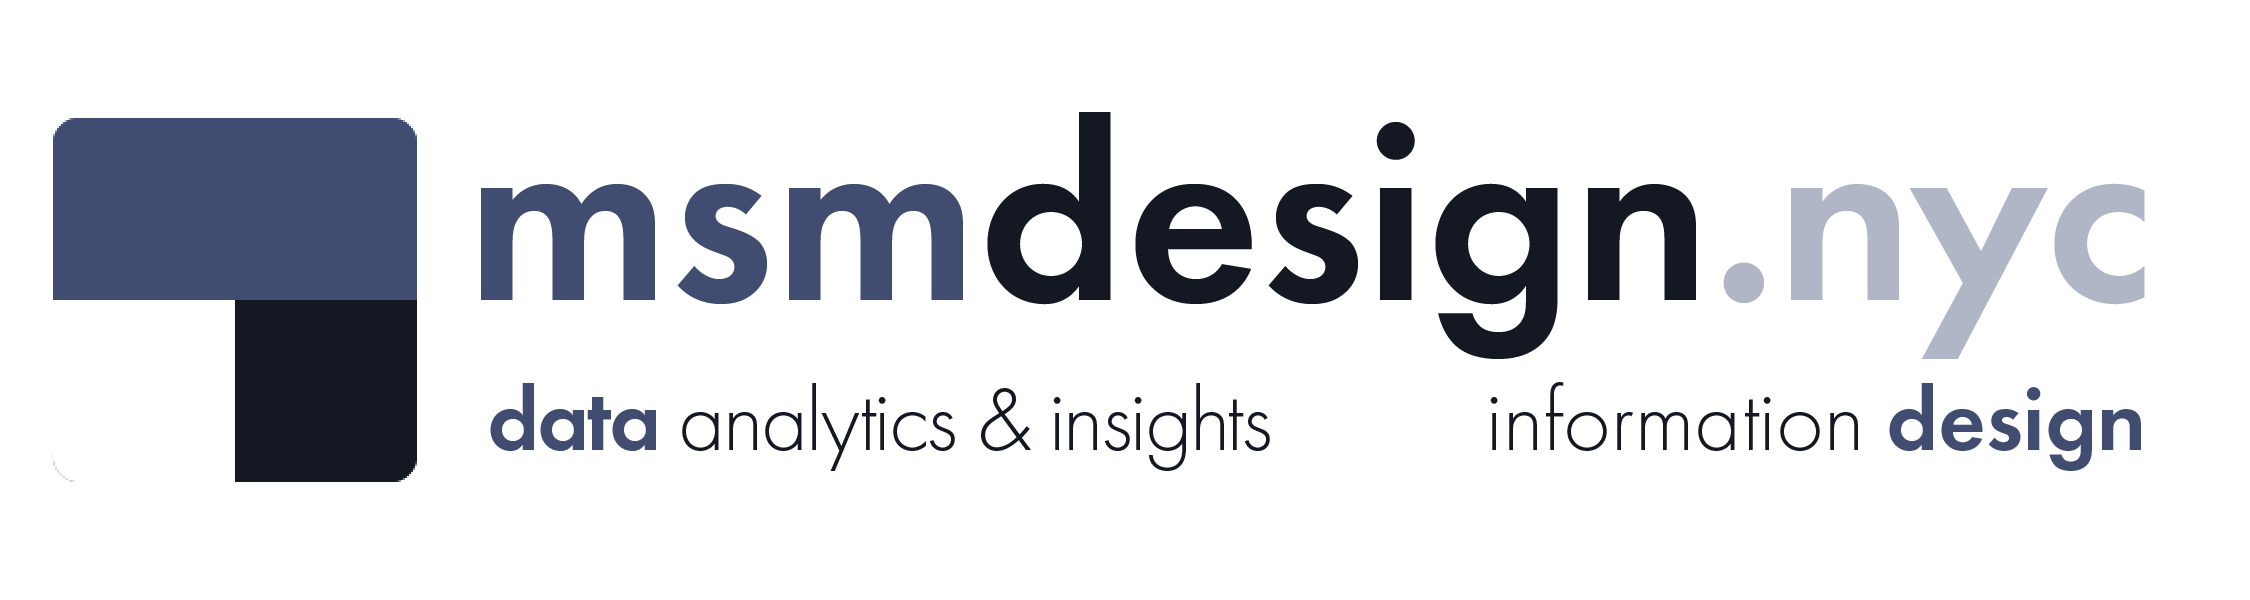

---
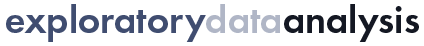

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# NYC Council Constituent Services

**Dataset Analyzed:** *Demographics by Community District*

**About This Dataset:** The dataset comes from CouncilStat, which is used by many NYC Council district offices to enter and track constituent cases that can range from issues around affordable housing, to potholes and pedestrian safety. This dataset aggregates the information that individual staff have input. However, district staffs handle a wide range of complex issues. Each offices uses the program differently, and thus records cases, differently and so comparisons between accounts may be difficult. Not all offices use the program. For more info - http://labs.council.nyc/districts/data/ Data provided by the New York City Council (NYCC): https://data.cityofnewyork.us/City-Government/NYC-Council-Constituent-Services/b9km-gdpy



**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-001


**EDA Publication Date:** Sunday, January 1, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [2]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='afmhot',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [3]:
%%html
<style>
table {float:left}
</style>

### 0.4 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [7]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\OneDrive\Documents\Personal_Code_and_Design_Files\data\NYC Open Data\NYC-01-NYC-Council-Constituent-Services\NYC_Council_Constituent_Services.csv"

cases = pd.read_csv(csv, encoding='utf-8')

In [12]:
# glimpse the first three rows

cases.head(3)

,UNIQUE_KEY,ACCOUNT,OPENDATE,COMPLAINT_TYPE,DESCRIPTOR,ZIP,BOROUGH,CITY,COUNCIL_DIST,COMMUNITY_BOARD,CLOSEDATE
0,NYCC01506329,NYCC01,01/02/2015,Aging,Senior Centers,11220,Brooklyn,Brooklyn,NYCC38,07 Brooklyn,01/14/2015
1,NYCC01506331,NYCC01,01/04/2015,Aging,NaN,11373,Queens,Elmhurst,NYCC21,04 Queens,03/25/2016
2,NYCC01506332,NYCC01,01/04/2015,Aging,NaN,11373,Queens,Elmhurst,NYCC21,04 Queens,03/25/2016


In [13]:
# glimpse the last three rows

cases.tail(3)

,UNIQUE_KEY,ACCOUNT,OPENDATE,COMPLAINT_TYPE,DESCRIPTOR,ZIP,BOROUGH,CITY,COUNCIL_DIST,COMMUNITY_BOARD,CLOSEDATE
316554,NYCC51506045,NYCC51,12/16/2022,Finance,Property Tax Rebate,10303,Staten Island,Staten Island,NYCC49,01 Staten Island,12/16/2022
316555,NYCC51506046,NYCC51,12/20/2022,Transportation,Pot Holes,10303,Staten Island,Staten Island,NYCC49,01 Staten Island,NaN
316556,NYCC51506047,NYCC51,12/20/2022,Utilities,Con Edison,10306,NaN,Staten Island,NaN,,NaN


In [14]:
# glimpse ten randomly selected rows

cases.sample(10, random_state=42)

,UNIQUE_KEY,ACCOUNT,OPENDATE,COMPLAINT_TYPE,DESCRIPTOR,ZIP,BOROUGH,CITY,COUNCIL_DIST,COMMUNITY_BOARD,CLOSEDATE
20639,NYCC03540804,NYCC03,11/17/2016,Transportation,Street Lights,10014,Manhattan,New York,NYCC03,02 Manhattan,11/22/2016
126330,NYCC20506234,NYCC20,06/09/2022,Environment,NaN,NaN,NaN,Fresh Meadows,NaN,,NaN
88465,NYCC10515434,NYCC10,10/06/2022,NaN,NaN,10468,Bronx,Bronx,NYCC14,08 Bronx,NaN
305571,NYCC50528257,NYCC50,06/25/2020,COVID-19,Health,10306,Staten Island,Staten Island,NYCC50,02 Staten Island,06/25/2020
243996,NYCC46511873,NYCC46,12/17/2018,Civil Service and Labor,Employee Benefits and Retirement,11236,Brooklyn,Brooklyn,NYCC46,18 Brooklyn,12/17/2018
178729,NYCC30507836,NYCC30,06/26/2016,Public Safety,NaN,11385,Queens,Ridgewood,NYCC30,05 Queens,04/23/2018
113859,NYCC15515185,NYCC15,12/13/2018,General Welfare,Homeless Shelter - HRA,NaN,NaN,NaN,NYCC,,12/19/2018
304628,NYCC50527303,NYCC50,04/20/2020,Finance,SCHE,10314,Staten Island,Staten Island,NYCC50,01 Staten Island,04/20/2020
217943,NYCC40511794,NYCC40,11/09/2016,Immigration,Literary Services for Immigrants,10016,Manhattan,New York,NYCC02,06 Manhattan,11/09/2016
142801,NYCC23519563,NYCC23,12/13/2022,Transportation,Traffic Congestion,11426,Queens,Bellerose,NYCC23,13 Queens,NaN


**The data has been loaded and has been read in as expected.**

### 0.5. Check the data type of each column

In [15]:
# display a listing of each of the DataFrame's columns and its data type

cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316557 entries, 0 to 316556
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   UNIQUE_KEY       316557 non-null  object
 1   ACCOUNT          316557 non-null  object
 2   OPENDATE         316557 non-null  object
 3   COMPLAINT_TYPE   299492 non-null  object
 4   DESCRIPTOR       288451 non-null  object
 5   ZIP              269552 non-null  object
 6   BOROUGH          259617 non-null  object
 7   CITY             283262 non-null  object
 8   COUNCIL_DIST     263858 non-null  object
 9   COMMUNITY_BOARD  305961 non-null  object
 10  CLOSEDATE        294570 non-null  object
dtypes: object(11)
memory usage: 26.6+ MB


**All of the columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.6 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/b9km-gdpy/files/ecaa1d2b-ead8-473e-b269-fa385f4d368b?download=true&filename=Data%20Dictionary%20CouncilStat.xlsx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [17]:
# leave the 'UNIQUE_KEY' and ACCOUNT' columns as is

In [25]:
# cast the 'OPENDATE' and 'CLOSEDATE' columns to datetime data type

cases['OPENDATE']  = pd.to_datetime(cases['OPENDATE'], errors='coerce')

cases['CLOSEDATE'] = pd.to_datetime(cases['CLOSEDATE'], errors='coerce')

In [24]:
# cast the following columns column to categorical data type:
# 'COMPLAINT_TYPE', 'DESCRIPTOR', 'ZIP', 'BOROUGH', 'CITY', 'COUNCIL_DIST', and 'COMMUNITY_BOARD'

cases['COMPLAINT_TYPE']  = cases['COMPLAINT_TYPE'].astype('category')
cases['DESCRIPTOR']      = cases['DESCRIPTOR'].astype('category')
cases['ZIP']             = cases['ZIP'].astype('category')
cases['BOROUGH']         = cases['BOROUGH'].astype('category')
cases['CITY']            = cases['CITY'].astype('category')
cases['COUNCIL_DIST']    = cases['COUNCIL_DIST'].astype('category')
cases['COMMUNITY_BOARD'] = cases['COMMUNITY_BOARD'].astype('category')

In [26]:
# display the DataFrame info once again to confirm that the data type changes have been made

cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316557 entries, 0 to 316556
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   UNIQUE_KEY       316557 non-null  object        
 1   ACCOUNT          316557 non-null  object        
 2   OPENDATE         316557 non-null  datetime64[ns]
 3   COMPLAINT_TYPE   299492 non-null  category      
 4   DESCRIPTOR       288451 non-null  category      
 5   ZIP              269552 non-null  category      
 6   BOROUGH          259617 non-null  category      
 7   CITY             283262 non-null  category      
 8   COUNCIL_DIST     263858 non-null  category      
 9   COMMUNITY_BOARD  305961 non-null  category      
 10  CLOSEDATE        294570 non-null  datetime64[ns]
dtypes: category(7), datetime64[ns](2), object(2)
memory usage: 13.1+ MB


---

## **1. Describe the characteristics of the data set**

### 1.1 How many rows and how many columns are in our data set?

In [33]:
# display the number of rows and columns in the DataFrame

rows = cases.shape[0]
columns = cases.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 316557 rows and 11 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [34]:
# display the index of the DataFrame

cases.index

RangeIndex(start=0, stop=316557, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual constituent case.

### 1.3 What are the column headings in our data set?

In [35]:
# display a list of the DataFrame's columns

all_cols = list(cases.columns)
print(all_cols)

['UNIQUE_KEY', 'ACCOUNT', 'OPENDATE', 'COMPLAINT_TYPE', 'DESCRIPTOR', 'ZIP', 'BOROUGH', 'CITY', 'COUNCIL_DIST', 'COMMUNITY_BOARD', 'CLOSEDATE']


### 1.4 What are the data types of each column?

In [32]:
# display the data type of each column in the DataFrame

cases.dtypes

UNIQUE_KEY                 object
ACCOUNT                    object
OPENDATE           datetime64[ns]
COMPLAINT_TYPE           category
DESCRIPTOR               category
ZIP                      category
BOROUGH                  category
CITY                     category
COUNCIL_DIST             category
COMMUNITY_BOARD          category
CLOSEDATE          datetime64[ns]
dtype: object

### 1.5 How many null values are in each column?

In [37]:
# display the number of missing values in each column of the DataFrame

cases.isna().sum()

UNIQUE_KEY             0
ACCOUNT                0
OPENDATE               0
COMPLAINT_TYPE     17065
DESCRIPTOR         28106
ZIP                47005
BOROUGH            56940
CITY               33295
COUNCIL_DIST       52699
COMMUNITY_BOARD    10596
CLOSEDATE          21987
dtype: int64

### 1.6 How many unique values are there in each column?

In [38]:
# display the count of unique elements in each column

cases.nunique(axis=0, dropna=True)

UNIQUE_KEY         316456
ACCOUNT                51
OPENDATE             2869
COMPLAINT_TYPE         58
DESCRIPTOR           1141
ZIP                  1317
BOROUGH                 5
CITY                 1379
COUNCIL_DIST          154
COMMUNITY_BOARD        97
CLOSEDATE            2339
dtype: int64

---

## **2. Briefly summarize the contents of the data set**

### 2.1 Summarize the columns containing categorical variables

In [49]:
# summarize the data contained in columns with the 'category' data type only

cases.describe(include=['category'])

,COMPLAINT_TYPE,DESCRIPTOR,ZIP,BOROUGH,CITY,COUNCIL_DIST,COMMUNITY_BOARD
count,299492,288451,269552,259617,283262,263858,305961
unique,58,1141,1317,5,1379,154,97
top,Housing and Buildings,Tax Preparation Assi,10314,Manhattan,Brooklyn,NYCC50,
freq,71048,8188,10694,76599,79501,22412,55056


### 2.2 Summarize the columns containing qualitatitive data

In [40]:
# summarize the data contained in columns with the 'object' data type only

cases.describe(include=[object])  

,UNIQUE_KEY,ACCOUNT
count,316557,316557
unique,316456,51
top,NYCC02513185,NYCC50
freq,2,28689


In [48]:
# summarize the data contained in columns with the 'datetime' data type only

cases.describe(datetime_is_numeric=True) 

,OPENDATE,CLOSEDATE
count,316557,294570
mean,2018-07-06 14:52:48.453074944,2018-09-09 16:18:54.518790144
min,2015-01-01 00:00:00,2015-01-02 00:00:00
25%,2016-07-28 00:00:00,2016-09-27 00:00:00
50%,2018-03-13 00:00:00,2018-06-15 00:00:00
75%,2020-02-05 00:00:00,2020-04-08 00:00:00
max,2022-12-31 00:00:00,2022-12-30 00:00:00


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [51]:
# display all columns

list(cases.columns)

['UNIQUE_KEY',
 'ACCOUNT',
 'OPENDATE',
 'COMPLAINT_TYPE',
 'DESCRIPTOR',
 'ZIP',
 'BOROUGH',
 'CITY',
 'COUNCIL_DIST',
 'COMMUNITY_BOARD',
 'CLOSEDATE']

In [58]:
# let's examine complaint types by open date, close date, borough, district, and community board

selected_cols = ['UNIQUE_KEY',
                 'OPENDATE',
                 'CLOSEDATE',
                 'COMPLAINT_TYPE',
                 'BOROUGH',
                 'COUNCIL_DIST',
                 'COMMUNITY_BOARD']

cases_focus_cols = cases[selected_cols]

### 3.2 Select a subset of rows

In [66]:
# let's drop rows that contain open cases (close date is missing) and rows with incomplete case information

# drop rows with null values and assign to a new DataFrame
closed_cases = cases_focus_cols.copy().dropna(axis=0, how='any')


In [67]:
# confirm that rows with missing data have been dropped

closed_cases.isna().sum()

UNIQUE_KEY         0
OPENDATE           0
CLOSEDATE          0
COMPLAINT_TYPE     0
BOROUGH            0
COUNCIL_DIST       0
COMMUNITY_BOARD    0
dtype: int64

In [68]:
# display the number of rows and columns in the resulting data set

closed_cases.shape

(229906, 7)

In [78]:
# subset cases from the year 2022 only

cases2022 = closed_cases.loc[(closed_cases['OPENDATE'] >= '2022-01-01 00:00:00') 
                           & (closed_cases['OPENDATE'] < '2023-01-01 00:00:00')]

In [79]:
# confirm that all cases in the resulting subset are from the year 2022 only

cases2022.describe(datetime_is_numeric=True) 

,OPENDATE,CLOSEDATE
count,16370,16370
mean,2022-07-04 04:32:46.915088640,2022-07-27 11:22:52.706169600
min,2022-01-01 00:00:00,2022-01-02 00:00:00
25%,2022-04-20 00:00:00,2022-05-17 00:00:00
50%,2022-07-12 00:00:00,2022-08-03 00:00:00
75%,2022-09-19 18:00:00,2022-10-12 00:00:00
max,2022-12-30 00:00:00,2022-12-30 00:00:00


---

## 4. **Describe and summarize the selected subset of data**

### 4.1 Complaints by Type

In [114]:
# what is total number of complaints filed in 2022?

cases2022['UNIQUE_KEY'].count()

16370

In [81]:
# how many different types of complaints were filed in 2022?

cases2022['COMPLAINT_TYPE'].nunique()

34

In [100]:
# display each different type of complaint that was filed in 2022

complaints = pd.Series(cases2022['COMPLAINT_TYPE'].unique())

complaints.sort_values(ignore_index=True)

0                         Aging
1        CIVIL AND HUMAN RIGHTS
2                     CONTRACTS
3                      COVID-19
4              CRIMINAL JUSTICE
5       Civil Service and Labor
6              Consumer Affairs
7           Consumer Complaints
8              Cultural Affairs
9                  Economy/Jobs
10                    Education
11                  Environment
12    FIRE AND EMERGENCY MANAGE
13                      Finance
14              General Welfare
15      Governmental Operations
16                    HOSPITALS
17                       Health
18        Housing and Buildings
19       Human and Civil Rights
20                  Immigration
21               JUSTICE SYSTEM
22          Land Use and Zoning
23               Legal Services
24    MENTAL HEALTH-DISABILITY-
25                        Parks
26                Public Safety
27              Quality of Life
28      Recovery and Resiliency
29                   Sanitation
30               Transportation
31      

In [125]:
# how many complaints of each type were filed?

cases2022['COMPLAINT_TYPE'].value_counts()

Housing and Buildings        4739
Transportation               1817
General Welfare              1676
Finance                       975
Environment                   815
Parks                         805
Public Safety                 800
Sanitation                    760
Immigration                   545
Utilities                     537
Governmental Operations       467
Quality of Life               336
Health                        316
Education                     292
COVID-19                      266
Aging                         226
Economy/Jobs                  212
Legal Services                200
Consumer Affairs              177
Land Use and Zoning           174
Civil Service and Labor       108
Cultural Affairs               44
Human and Civil Rights         23
Youth Services                 21
Recovery and Resiliency         9
Veterans Affairs                8
FIRE AND EMERGENCY MANAGE       6
HOSPITALS                       5
CRIMINAL JUSTICE                3
Consumer Compl

### 4.2 Complaints by Borough

In [110]:
# how many different NYC boroughs are represented in the data subset?

cases2022['BOROUGH'].nunique()

5

In [111]:
# display each different NYC borough represented in the data subset
districts = pd.Series(cases2022['BOROUGH'].unique())

districts.sort_values(ignore_index=True)

0            Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
dtype: category
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [115]:
# how many complaints were filed in each borough?

cases2022.groupby('BOROUGH')['UNIQUE_KEY'].count()

BOROUGH
Bronx            1360
Brooklyn         4829
Manhattan        6680
Queens           1761
Staten Island    1740
Name: UNIQUE_KEY, dtype: int64

### 4.3 Complaints by Council District

In [108]:
# how many different council districts are represented in the data subset?

cases2022['COUNCIL_DIST'].nunique()

51

In [109]:
# display each different council district represented in the data subset
districts = pd.Series(cases2022['COUNCIL_DIST'].unique())

districts.sort_values(ignore_index=True)

0     NYCC01
1     NYCC02
2     NYCC03
3     NYCC04
4     NYCC05
5     NYCC06
6     NYCC07
7     NYCC08
8     NYCC09
9     NYCC10
10    NYCC11
11    NYCC12
12    NYCC13
13    NYCC14
14    NYCC15
15    NYCC16
16    NYCC17
17    NYCC18
18    NYCC19
19    NYCC20
20    NYCC21
21    NYCC22
22    NYCC23
23    NYCC24
24    NYCC25
25    NYCC26
26    NYCC27
27    NYCC28
28    NYCC29
29    NYCC30
30    NYCC31
31    NYCC32
32    NYCC33
33    NYCC34
34    NYCC35
35    NYCC36
36    NYCC37
37    NYCC38
38    NYCC39
39    NYCC40
40    NYCC41
41    NYCC42
42    NYCC43
43    NYCC44
44    NYCC45
45    NYCC46
46    NYCC47
47    NYCC48
48    NYCC49
49    NYCC50
50    NYCC51
dtype: category
Categories (154, object): ['NYCC', 'NYCC001', 'NYCC002', 'NYCC003', ..., 'NYCC7', 'NYCC8', 'NYCC9', 'NYCCNew York']

In [127]:
# how many complaints were filed in each council district?

cases2022['COUNCIL_DIST'].value_counts()

NYCC48          1534
NYCC50          1415
NYCC02          1403
NYCC06          1300
NYCC46          1259
NYCC03          1040
NYCC08           981
NYCC10           834
NYCC14           802
NYCC23           801
NYCC07           486
NYCC38           362
NYCC20           348
NYCC45           347
NYCC37           325
NYCC43           308
NYCC09           287
NYCC01           232
NYCC51           210
NYCC12           163
NYCC47           161
NYCC18           120
NYCC49           115
NYCC31           112
NYCC29            94
NYCC04            85
NYCC13            85
NYCC35            81
NYCC44            81
NYCC34            81
NYCC21            80
NYCC15            67
NYCC41            66
NYCC28            64
NYCC27            63
NYCC22            62
NYCC42            60
NYCC40            52
NYCC36            51
NYCC17            48
NYCC19            48
NYCC16            46
NYCC39            42
NYCC05            32
NYCC11            29
NYCC24            28
NYCC26            23
NYCC33       

### 4.4 Complaints by Community Board

In [112]:
# how many different community boards are represented in the data subset?

cases2022['COMMUNITY_BOARD'].nunique()

61

In [113]:
# display each different community board represented in the data subset
districts = pd.Series(cases2022['COMMUNITY_BOARD'].unique())

districts.sort_values(ignore_index=True)

0            Manhattan
1               Queens
2             01 Bronx
3          01 Brooklyn
4         01 Manhattan
5            01 Queens
6     01 Staten Island
7             02 Bronx
8          02 Brooklyn
9         02 Manhattan
10           02 Queens
11    02 Staten Island
12            03 Bronx
13         03 Brooklyn
14        03 Manhattan
15           03 Queens
16    03 Staten Island
17            04 Bronx
18         04 Brooklyn
19        04 Manhattan
20           04 Queens
21            05 Bronx
22         05 Brooklyn
23        05 Manhattan
24           05 Queens
25            06 Bronx
26         06 Brooklyn
27        06 Manhattan
28           06 Queens
29            07 Bronx
30         07 Brooklyn
31        07 Manhattan
32           07 Queens
33            08 Bronx
34         08 Brooklyn
35        08 Manhattan
36           08 Queens
37            09 Bronx
38         09 Brooklyn
39        09 Manhattan
40           09 Queens
41            10 Bronx
42         10 Brooklyn
43        1

In [126]:
# how many complaints were filed in each community board?

cases2022['COMMUNITY_BOARD'].value_counts()

07 Manhattan        1398
18 Brooklyn         1224
15 Brooklyn         1217
02 Staten Island    1152
03 Manhattan        1050
12 Manhattan         906
11 Manhattan         703
04 Manhattan         652
05 Bronx             575
02 Manhattan         443
06 Manhattan         419
11 Queens            408
01 Manhattan         397
07 Queens            367
14 Brooklyn          360
13 Brooklyn          355
13 Queens            333
03 Staten Island     330
09 Manhattan         329
07 Brooklyn          298
10 Brooklyn          261
01 Staten Island     258
07 Bronx             222
17 Brooklyn          190
10 Manhattan         177
05 Manhattan         169
05 Brooklyn          168
04 Brooklyn          159
11 Brooklyn          141
08 Queens            136
12 Bronx             128
09 Bronx             118
12 Queens            112
12 Brooklyn          103
10 Bronx              84
06 Queens             79
01 Brooklyn           76
14 Queens             75
16 Brooklyn           74
04 Queens             72


---

In [128]:
# export data for data graphic creation


data = cases2022['COMPLAINT_TYPE'].value_counts()

In [129]:
data.to_csv('complaints_by_type.csv')

---

---